

---

# **Estadística Descriptiva y Visualizacion de Datos Textuales**



---





In [ ]:

#install.packages("quanteda")
install.packages("quanteda.textstats")
install.packages("quanteda.textplots")


In [1]:
library(quanteda)
library(quanteda.textstats)
library(quanteda.textplots)

Package version: 3.3.1
Unicode version: 13.0
ICU version: 69.1

Parallel computing: 20 of 20 threads used.

See https://quanteda.io for tutorials and examples.



# I. Word Clouds

Las **word clouds**, también conocidas como **nubes de palabras**, son representaciones visuales de un conjunto de palabras en un texto o conjunto de textos. En una word cloud, las palabras más frecuentes se muestran en un tamaño más grande y generalmente se colocan en el centro o en una posición prominente, mientras que las palabras menos frecuentes se muestran en un tamaño más pequeño y se colocan en posiciones menos destacadas.

Partamos por tokenizar y crear una dfm para el corpus de discursos inaugurales.

In [2]:
toks <- tokens(data_corpus_inaugural, remove_punct = TRUE) %>%
  tokens_remove(pattern = stopwords("en")) %>%
  tokens_tolower()

print(toks)

Tokens consisting of 59 documents and 4 docvars.
1789-Washington :
 [1] "fellow-citizens" "senate"          "house"           "representatives"
 [5] "among"           "vicissitudes"    "incident"        "life"           
 [9] "event"           "filled"          "greater"         "anxieties"      
[ ... and 640 more ]

1793-Washington :
 [1] "fellow"     "citizens"   "called"     "upon"       "voice"     
 [6] "country"    "execute"    "functions"  "chief"      "magistrate"
[11] "occasion"   "proper"    
[ ... and 50 more ]

1797-Adams :
 [1] "first"       "perceived"   "early"       "times"       "middle"     
 [6] "course"      "america"     "remained"    "unlimited"   "submission" 
[11] "foreign"     "legislature"
[ ... and 1,058 more ]

1801-Jefferson :
 [1] "friends"   "fellow"    "citizens"  "called"    "upon"      "undertake"
 [7] "duties"    "first"     "executive" "office"    "country"   "avail"    
[ ... and 801 more ]

1805-Jefferson :
 [1] "proceeding"    "fellow"        "ci

In [3]:
dfmat <- dfm(toks)
print(dfmat)

Document-feature matrix of: 59 documents, 9,285 features (92.70% sparse) and 4 docvars.
                 features
docs              fellow-citizens senate house representatives among
  1789-Washington               1      1     2               2     1
  1793-Washington               0      0     0               0     0
  1797-Adams                    3      1     0               2     4
  1801-Jefferson                2      0     0               0     1
  1805-Jefferson                0      0     0               0     7
  1809-Madison                  1      0     0               0     0
                 features
docs              vicissitudes incident life event filled
  1789-Washington            1        1    1     2      1
  1793-Washington            0        0    0     0      0
  1797-Adams                 0        0    2     0      0
  1801-Jefferson             0        0    1     0      0
  1805-Jefferson             0        0    2     0      0
  1809-Madison               

El comando **textplot_wordcloud()** se utiliza para generar este tipo de gráficos. Nótese la opción *max_words = 150*.

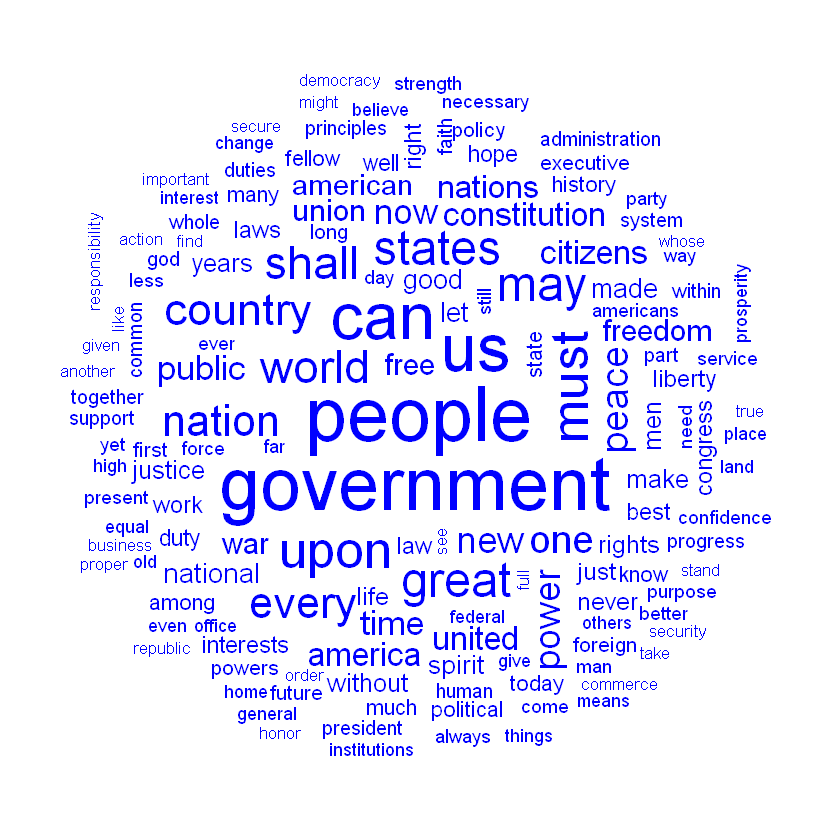

In [4]:
cloud_basic <- textplot_wordcloud(dfmat,
                   max_words = 150, color = c("blue"),
                   labelcolor = "black")

Queremos repetir el gráfico anterior, pero por partido político. Veamos qué informción tenemos en los docvars para llevar a cabo este análisis.

In [5]:
docvars(dfmat)


Year,President,FirstName,Party
<int>,<chr>,<chr>,<fct>
1789,Washington,George,none
1793,Washington,George,none
1797,Adams,John,Federalist
1801,Jefferson,Thomas,Democratic-Republican
1805,Jefferson,Thomas,Democratic-Republican
1809,Madison,James,Democratic-Republican
1813,Madison,James,Democratic-Republican
1817,Monroe,James,Democratic-Republican
1821,Monroe,James,Democratic-Republican


Un poco incómdo para ver cuáles son las docvars y qué categorías incluye. Sin embarfo, Quanteda se integra fácilmente con las funciones de R utilizadas para explorar una base de datos:

In [6]:
names(docvars(dfmat))
levels(dfmat$Party)

[1] "Year"      "President" "FirstName" "Party"

[1] "Democratic"            "Democratic-Republican" "Federalist"           
[4] "none"                  "Republican"            "Whig"

Como ya se habrá notado, hay una lógica y notación unificada en los comandos de Quanteda. dfmat_*something*(), por ejemplo, corresponden a funciones que se aplican sobre dfms.

## **dfm_group**

La función **dfm_group()** permite agrupar las características de un dfm según una variable o factor específico. Esto puede ser útil, por ejemplo, cuando se desea agrupar las palabras por categorías o etiquetas predefinidas. La función devuelve un nuevo dfm en el que las características se agrupan según los valores únicos de la variable especificada.

La función **dfm_subset()** permite seleccionar un subconjunto de filas (documentos) y/o columnas (características o *features*) de un dfm, según condiciones específicas. Se pueden utilizar diferentes criterios para definir el subconjunto, como la presencia o ausencia de ciertas características o la longitud de los documentos.

In [9]:
dfmat_party <- dfmat |> dfm_group(groups = Party) |> 
                   dfm_subset(Party == "Republican" | Party == "Democratic" | Party == "Whig")
dfmat_party

Document-feature matrix of: 3 documents, 9,285 features (50.06% sparse) and 1 docvar.
            features
docs         fellow-citizens senate house representatives among vicissitudes
  Democratic               3      2     4               3    25            3
  Republican               9      5     4               6    52            0
  Whig                    13      6     1               4    10            0
            features
docs         incident life event filled
  Democratic        1   61     8      1
  Republican        2   61     2      1
  Whig              2    4     0      2
[ reached max_nfeat ... 9,275 more features ]

Warning message in wordcloud_comparison(x, min_size, max_size, min_count, max_words, :
"however could not be fit on page. It will not be plotted."
Warning message in wordcloud_comparison(x, min_size, max_size, min_count, max_words, :
"duties could not be fit on page. It will not be plotted."
Warning message in wordcloud_comparison(x, min_size, max_size, min_count, max_words, :
"institutions could not be fit on page. It will not be plotted."
Warning message in wordcloud_comparison(x, min_size, max_size, min_count, max_words, :
"revenue could not be fit on page. It will not be plotted."
Warning message in wordcloud_comparison(x, min_size, max_size, min_count, max_words, :
"rights could not be fit on page. It will not be plotted."
Warning message in wordcloud_comparison(x, min_size, max_size, min_count, max_words, :
"fellow-citizens could not be fit on page. It will not be plotted."
Warning message in wordcloud_comparison(x, min_size, max_size, min_count, max_words, :
"principle could not

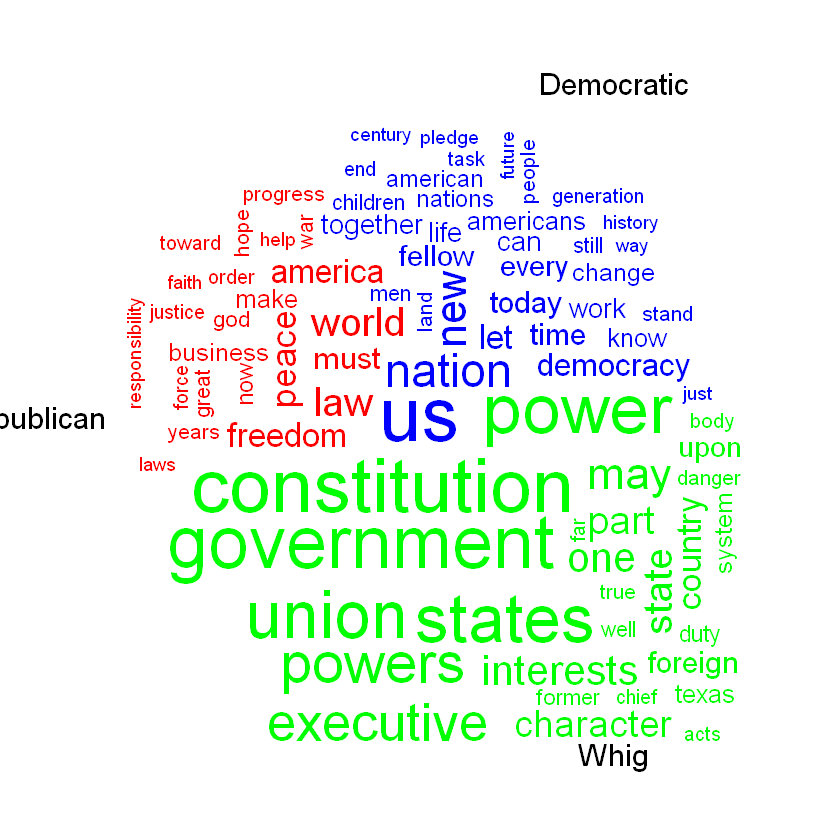

In [11]:
cloud_party <- textplot_wordcloud(dfmat_party, comparison = TRUE,
                   max_words = 150, color = c("blue", "red", "green"),
                   labelcolor = "black")




---


# II. Estadística Descriptiva Básica


## **summary()**



In [ ]:
summary(data_corpus_inaugural, n = 6)

In [ ]:
summary(dfmat)

Nótese que el uso de summary() en un  corpus entrega un resumen de las longitudes de los documentos y  de las variables del mismo. El uso de summary() en otros objetos, como tokens o dfms,  funciona de forma diferente y puede que no sea lo que uno quiere.

In [ ]:
dim(dfmat)

**ntype()** y **ntoken()** funcionan bien con los dfms. Estas funciones pueden aplicarse a un  dfm sin ningún otro argumento para ver el número de types o tokens por documento.

In [ ]:
print(ntype(dfmat))

In [ ]:
print(ntoken(dfmat))

¿Y si queremos obtener información respecto de un documento en particular?

In [ ]:
print(ntype(dfmat)[1])
print(ntoken(dfmat)[1])

Esto que hicimos funcionó porque el ouput tanto para ntype() como para ntoken() es un *vector de enteros nombrado* (named integer vector), con los nombres de los elementos tomados de los nombres de los documentos (docnames) del objeto.

## **textstat_frequency()**

El comando **textstat_frequency()** puede utilizarse para hacer lo mismo que el comando **topfeatures()**, pero con información adicional, como por ejemplo, el rango de las características o su frecuencia en el corpus.

In [ ]:
print(topfeatures(dfmat))

In [ ]:
print(head(textstat_frequency(dfmat), n = 10))

Esta función es también muy versátil para analizar estas estadísticas por grupos:

In [ ]:
topfeatures(dfmat, n = 8, groups = President) %>%
  head(n = 3) %>%
  print()

In [ ]:
dfmat %>%
  head(n =5) %>%
  textstat_frequency(n = 8, groups = President) %>%
  print()

## Diversidad Léxica - **textstat_lexdiv()**

La **diversidad léxica** se refiere a la variedad de palabras o términos únicos utilizados en un texto o corpus. Es una medida de cuántos vocablos diferentes se emplean en comparación con el total de palabras presentes. La diversidad léxica se considera un indicador de la riqueza y variedad lingüística de un texto.

En Quanteda, la diversidad léxica se computa en base a la diversidad de tokens en relación con la longitud del documento, también conocida como *relación tipo-token* o *type-to-token ratio (TTR)*.



In [ ]:
library(dplyr)


In [ ]:
tstat_ld <- textstat_lexdiv(dfmat) %>% arrange(TTR)

head(tstat_ld, n=10)

In [ ]:
tstat_ld %>%
  arrange(desc(TTR)) %>%
  head()

class(tstat_ld)
names(tstat_ld)



---


# III. Basic Plots

## Largo de los Discursos en el Tiempo

Recordemos qué tenemos en las docvars:

In [ ]:
names(docvars(dfmat))

In [ ]:
dfmat$Tokens <- ntoken(dfmat)
names(docvars(dfmat))



In [ ]:
plot(dfmat$Year, dfmat$Tokens,
     main = "Frequency of Tokens by Year: 1789–2021", xlab = "Year", ylab = "Tokens",
     type = "b")

## Diversidad Léxica por Partidos

In [ ]:
names(docvars(dfmat))


Recuerde que TTR lo calculamos con la función *textstat_lexdiv(dfmat)* y lo guardamos en el objeto *tstat_ld*. ¿Qué tipo de objeto es este último?

In [ ]:
class(tstat_ld)
head(tstat_ld)

Importante: Mientras que los objetos principales en Quanteda (corpus, tokens, dfm) no son data.frames, docvars(dfmat) sí lo es. También, en general, loa output que produce **quanteda.textstats** son data.frames.

Podemos entonces extraer directamente la variable TTR de *tstat_ld* y agregarla a las docvars de nuestro dfm:

In [ ]:
dfmat$Diversity <- tstat_ld$TTR

In [ ]:
names(docvars(dfmat))
class(docvars(dfmat))

In [ ]:
docvars(dfmat)

In [ ]:
class(docvars(dfmat))

In [ ]:
library(ggplot2)

In [ ]:
Diversity_by_Party<- docvars(dfmat)

In [ ]:
tail(Diversity_by_Party)

Nótese que solo nos ineteresan las *docvars*.

In [ ]:
Diversity_by_Party %>% filter(Party=="Republican" | Party=="Democratic") %>% ggplot(aes(x = Party, y = Diversity, col=Party)) +
  geom_boxplot() +
  geom_point()+
  labs(x = "Party", y = "Vocabulary Size") +
  ggtitle("Textual Diversity by Party")